In [1]:
from src.perceptron import perceptron
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(221)
sns.set()

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df, fd = perceptron("creditcard", 
                    number_of_epoch=300, 
                    hidden_neurons=((), (15,), (10,), (5,), (10,5), (15,5)),
                    use_batch_norm_values=(True,),
                    optimizer_values=('rmsprop', ),
                    activation_values=('sigmoid', 'relu', 'linear', 'selu'),
                    training_sizes=(-1,)
                    )

14
Selected data set is creditcard with 10244 data (train: 10000 , test: 244 )


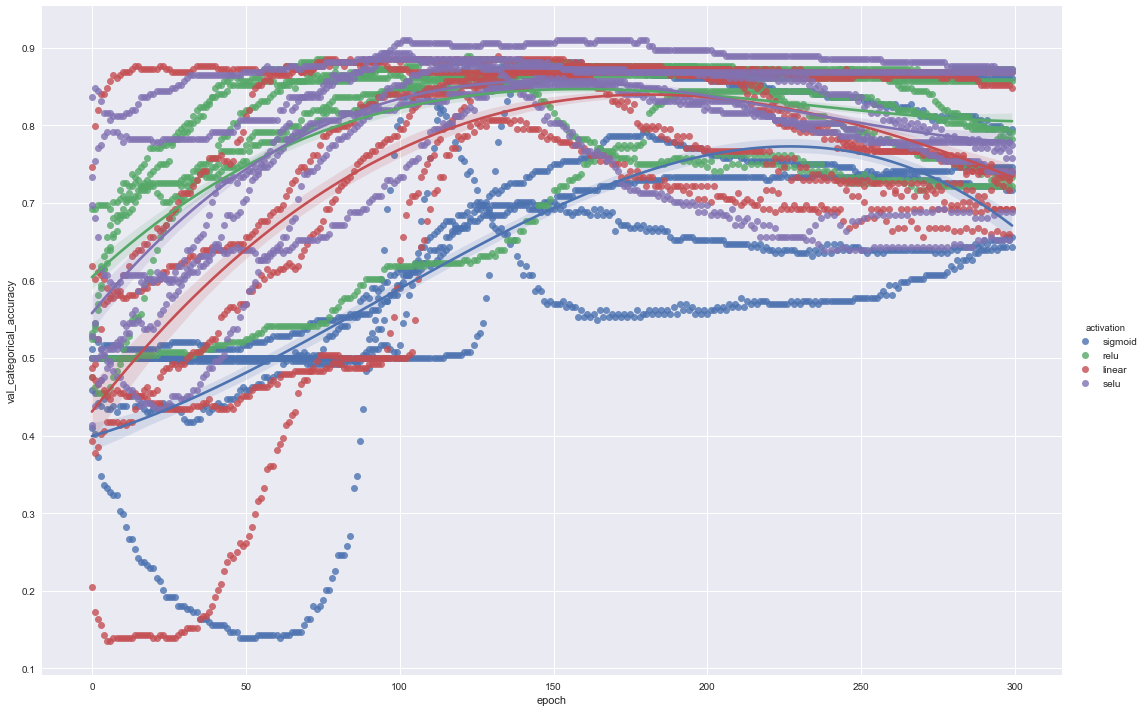

In [3]:
#mpl.plot(df.get('epoch'), df.get('val_categorical_accuracy'), 'c-', df.get('epoch'), df.get('categorical_accuracy'), 'm-')
g = sns.lmplot(x='epoch', y='val_categorical_accuracy', hue='activation', data=df, truncate=True, order=3, size=10, aspect=1.5)
# p = sns.lmplot(x='epoch', y='val_categorical_accuracy', col='layer', hue='activation', data=df, order=3, truncate=True, size=10)

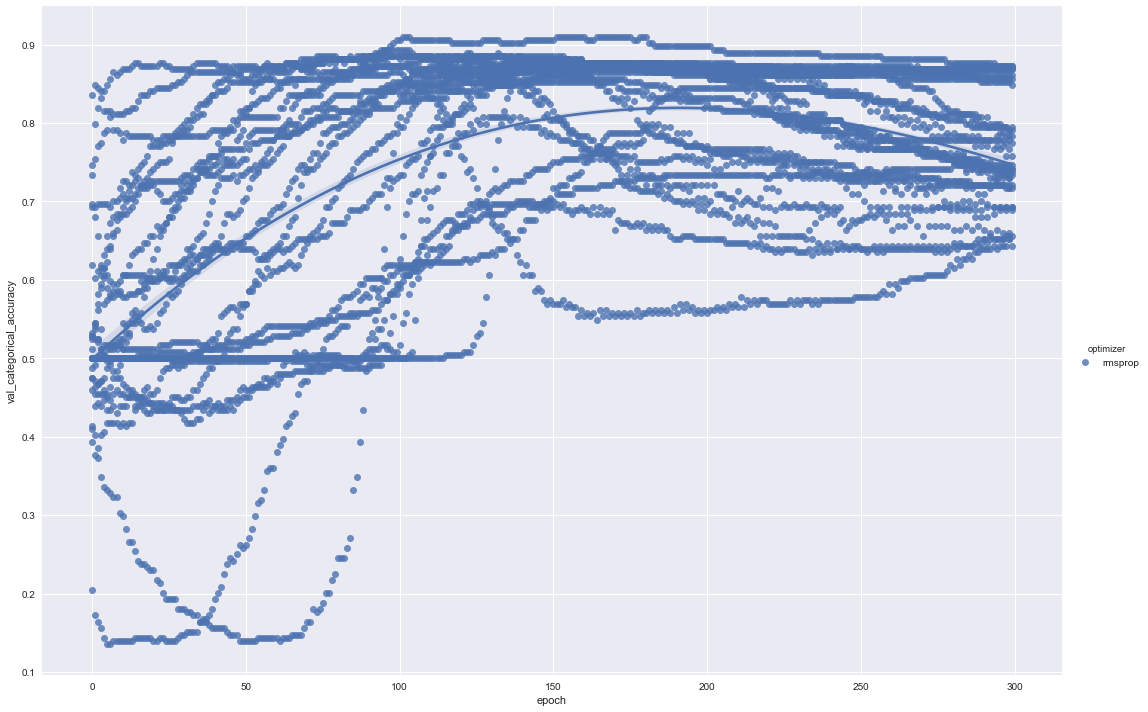

In [4]:
n = sns.lmplot(x='epoch', y='val_categorical_accuracy', hue='optimizer', data=df, truncate=True, order=3, size=10, aspect=1.5)

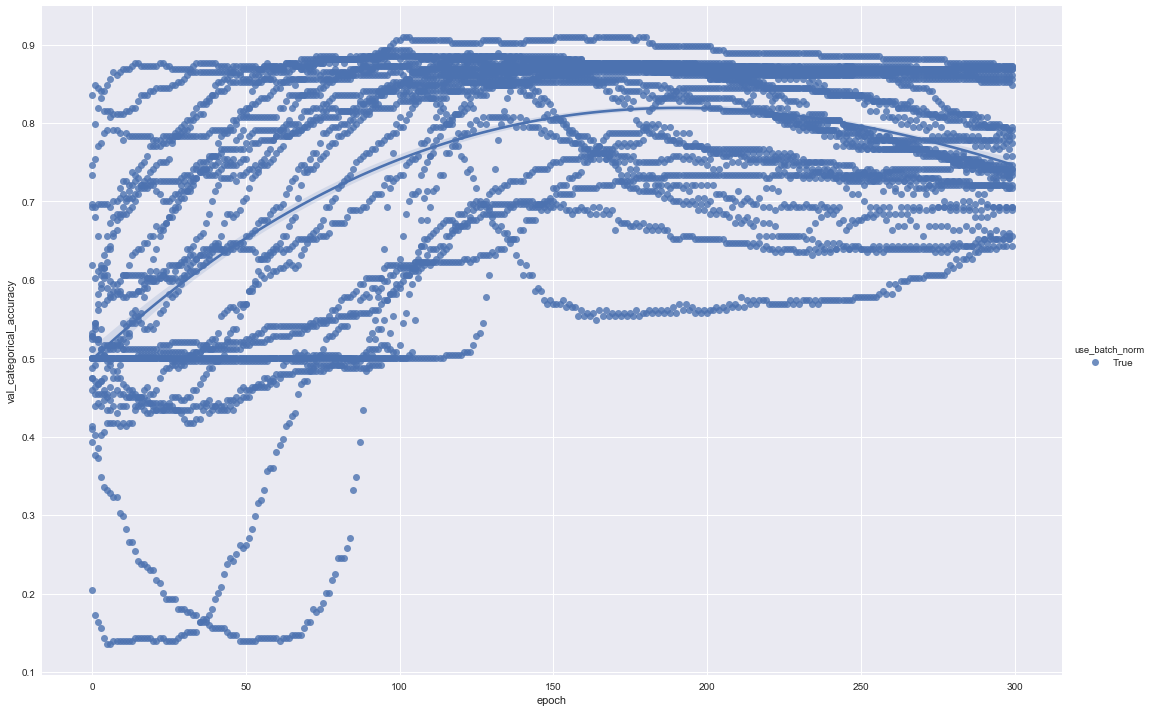

In [5]:
g = sns.lmplot(x='epoch', y='val_categorical_accuracy', hue='use_batch_norm', data=df, truncate=True, order=3, size=10, aspect=1.5)

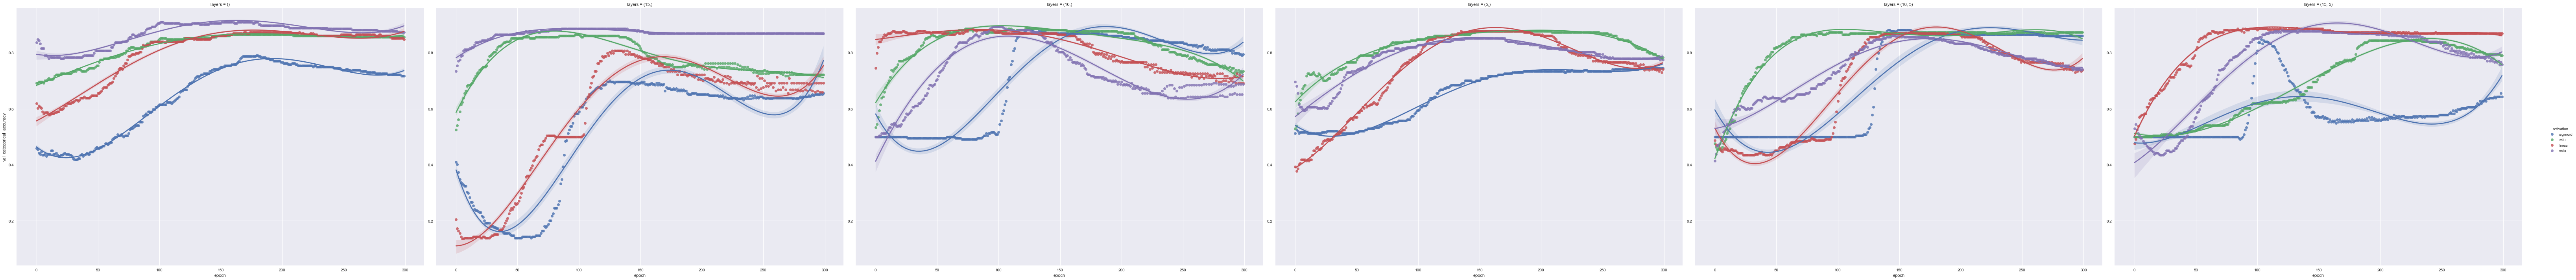

In [6]:
g = sns.lmplot(x='epoch', y='val_categorical_accuracy', hue='activation', col='layers', data=df, truncate=True, size=10, aspect=1.5, order=4)

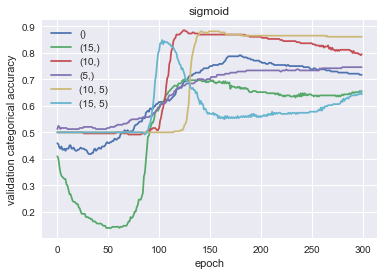

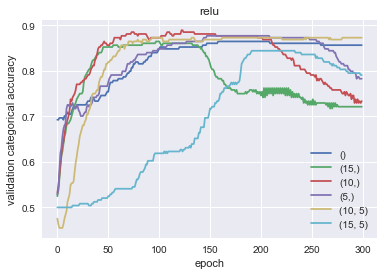

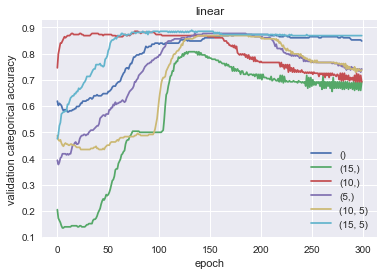

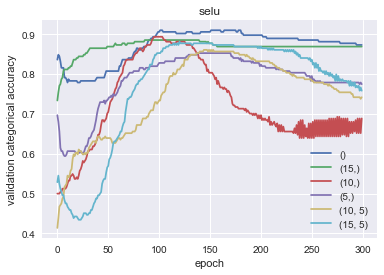

In [12]:
for activation_name, act_dict in fd['rmsprop'].items():
    plt.figure()
    for k, dtl in act_dict[True].items():
        d = dtl[-1]
        plt.plot(d.get('epoch'),d.get('val_categorical_accuracy'), label=k)
    plt.ylabel('validation categorical accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.title(activation_name)
    plt.savefig("graphs/per_"+str(activation_name)+"_"+str(k)+".png")
    plt.show()

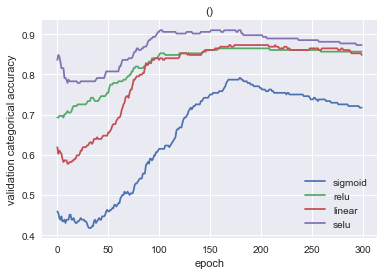

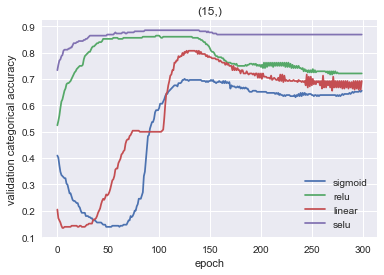

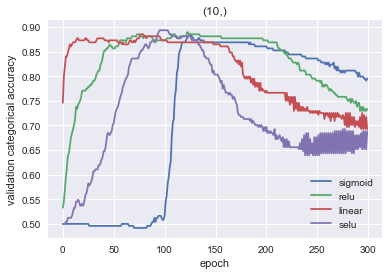

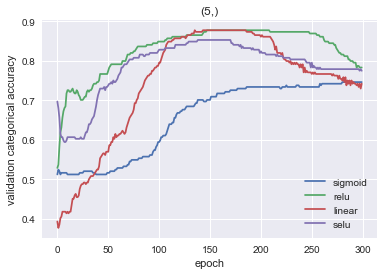

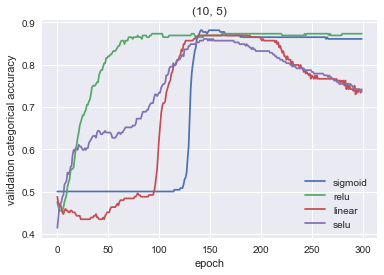

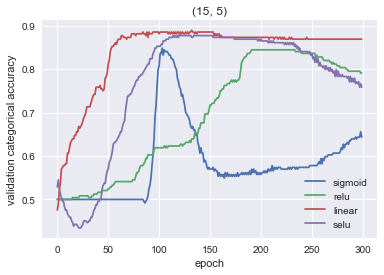

In [13]:
dd = {}
for activation_name, act_dict in fd['rmsprop'].items():
    for k, d in act_dict[True].items():
        if k not in dd:
            dd[k] = {}
        dd[k][activation_name] = d[-1]
        
for l, ld in dd.items():
    plt.figure()
    for a, d in ld.items():
        plt.plot(d.get('epoch'),d.get('val_categorical_accuracy'), label=a)
    plt.ylabel('validation categorical accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.title(l)
    plt.savefig("graphs/per_"+str(l)+"_"+str(a)+".png")
    plt.show()

In [9]:
print(df)

     epoch  val_loss  val_categorical_accuracy      loss  \
0      0.0  4.172701                  0.459016  1.021958   
1      1.0  2.991255                  0.454918  0.994607   
2      2.0  2.471994                  0.442623  0.975587   
3      3.0  2.174168                  0.438525  0.960096   
4      4.0  1.978794                  0.446721  0.946647   
5      5.0  1.839550                  0.434426  0.934588   
6      6.0  1.734704                  0.434426  0.923472   
7      7.0  1.652562                  0.438525  0.913107   
8      8.0  1.586265                  0.430328  0.903335   
9      9.0  1.531517                  0.438525  0.894044   
10    10.0  1.485479                  0.438525  0.885155   
11    11.0  1.446199                  0.438525  0.876603   
12    12.0  1.412287                  0.450820  0.868342   
13    13.0  1.382725                  0.450820  0.860333   
14    14.0  1.356748                  0.438525  0.852544   
15    15.0  1.333770                  0.